In [1]:
from pymks.fmks.Berkay_correlations import *
import numpy as np
from sklearn.decomposition import PCA

In [2]:
np.random.seed(123)
RandomImage=np.random.rand(100,20,20)
RandomImage[RandomImage<=0.5]=0
RandomImage[RandomImage>0.5]=1


In [3]:
import matplotlib.pyplot as plt
import dask.array as da

<function matplotlib.pyplot.show>

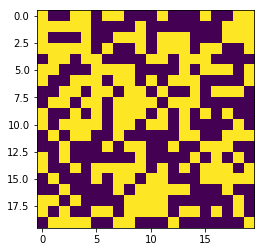

In [4]:
plt.imshow(RandomImage[0])
plt.show

In [5]:

chunks=RandomImage.shape
Imdata=da.from_array(RandomImage,chunks=chunks)
    
TwopointStats=auto_correlation(Imdata).compute()

<function matplotlib.pyplot.show>

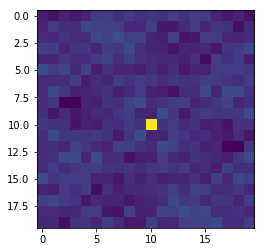

In [6]:
plt.imshow(TwopointStats[0])
plt.show

In [7]:

# # Goal

# model=Pipeline(steps=[
#     ('discretize', PrimitiveTransformer(n_state=5, min_=-1.0, max_=1.0)),
#     ('Autocorrelation',Transormation(RandomImage)),
#     ('reshape', ReshapeTransformer(shape=X.shape)),

#     ('regressor', LinearRegression())
    
# ])
# # We also need to include cut-off

In [8]:
from pymks.fmks.localization import LocalizationRegressor, flatten, ReshapeTransformer, coeff_to_real


In [9]:
np.random.seed(321)
data = np.arange(18).reshape((2, 9))

In [10]:
ReshapeTransformer((None, 3, 3)).fit(None, None).transform(data).shape

(2, 3, 3)

In [11]:
type(Imdata)

dask.array.core.Array

In [12]:
a=type(RandomImage)

In [13]:
type(RandomImage).__module__ == np.__name__

True

In [14]:
type(RandomImage) is np.ndarray

True

In [15]:
from pymks.fmks.Berkay_correlations import TwoPoint

In [16]:
reducer = PCA(n_components=3)

In [17]:
from sklearn.pipeline import Pipeline

Pipetest=Pipeline(steps=[
    ('cor',TwoPoint())
    
])

In [18]:
a=Pipetest.transform(RandomImage)

In [19]:
assert np.allclose(a[0],TwopointStats[0])

In [21]:
Pipetest=Pipeline(steps=[
    ('cor',TwoPoint()),
    ('flatten', FlattenTransformer())
    
])

In [22]:
ab=Pipetest.transform(RandomImage)

In [24]:
ab.shape

(100, 400)